In [1]:
import numpy as np
import pandas as pd 

# tSNE Introducion:
* tSNE tries to reduce dimension by preserving the neighborhood.
* This simply means if we are taking a point a, in the original dimension (50 Features) if my closest neighbors were b,c,d,e,f. In the lower dimension also my closest neghbors should be b,c,d,e,f (2 Featurs). 
* This simmilarity between the neighbors are measured by KL Divergence.

# tSNE syntax

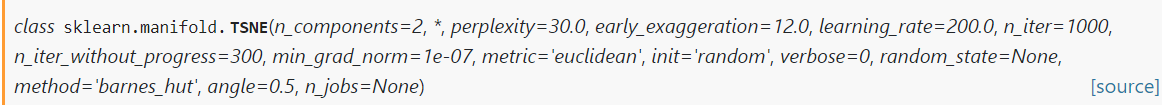

* n_components: What is the dimension size of the lower dimension space?
* perplexity: Decides kind of how many neighbors to be considered.  Value should be within 5 and 50. Larger datsets have realtively large perplexity value. 

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

## tSNE on makecircle

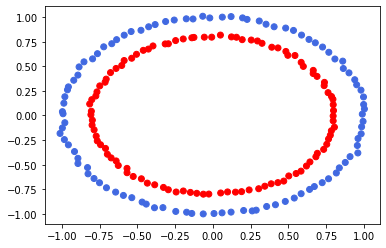

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

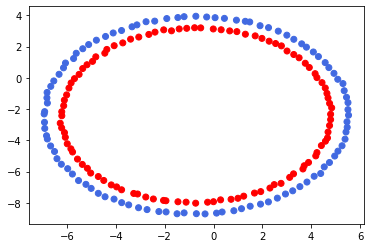

In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1],c=vectorizer(y))

# Perplexity aspect with tSNE 

In [5]:
tsne = TSNE(n_components=2,perplexity=5, random_state=42)
X_5 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=30, random_state=42)
X_30 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_40 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=100, random_state=42)
X_100 = tsne.fit_transform(X)

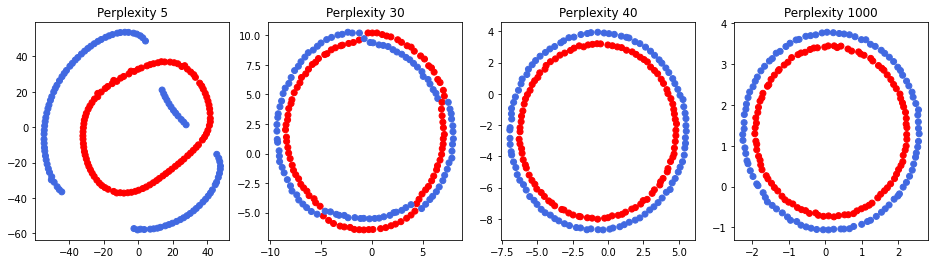

In [6]:
plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.gca().set_title('Perplexity 5')
plt.scatter(X_5[:,0], X_5[:,1],c=vectorizer(y))
plt.subplot(142)
plt.gca().set_title('Perplexity 30')
plt.scatter(X_30[:,0], X_30[:,1],c=vectorizer(y))
plt.subplot(143)
plt.gca().set_title('Perplexity 40')
plt.scatter(X_40[:,0], X_40[:,1],c=vectorizer(y))
plt.subplot(144)
plt.gca().set_title('Perplexity 1000')
plt.scatter(X_100[:,0], X_100[:,1],c=vectorizer(y))

# Making Swissroll

In [8]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

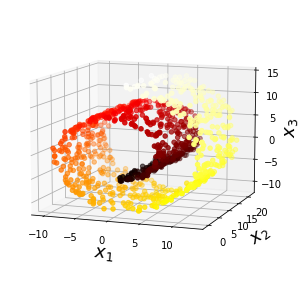

In [9]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [10]:
pca = PCA(n_components=2)
X_PCA=pca.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

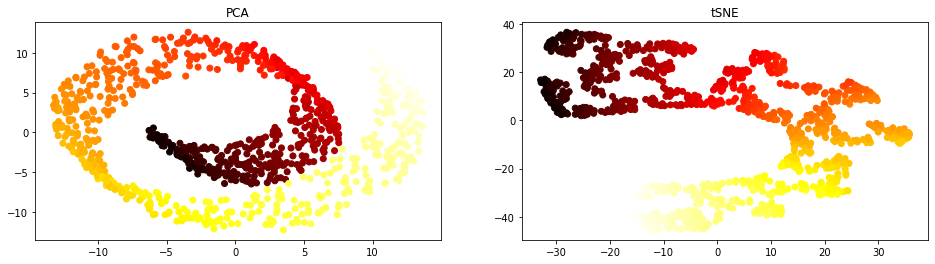

In [11]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.gca().set_title('PCA')
plt.scatter(X_PCA[:,0], X_PCA[:,1],c=t, cmap=plt.cm.hot)
plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=t, cmap=plt.cm.hot)